<a href="https://colab.research.google.com/github/hadar22/machineLearning/blob/main/classificationOfMonkeys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **סיווג תמונות של קופים לסוגי קופים**
המאגר נתונים:

המאגר נתונים שלי מכיל 10 סוגי קופים שונים

(n0 - mantled_howler

n1 - patas_monkey

n2 - bald_uakari

n3 - japanese_macaque

n4 - pygmy_marmoset

n5 - white_headed_capuchin

n6 - silvery_marmoset

n7 - 	common_squirrel_monkey

n8 - black_headed_night_monkey

n9 - nilgiri_langur)








In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd

drive.mount('/content/drive', force_remount=True)
%cd drive/My\ Drive/machineLearning

categories = ['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']

cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
labels = pd.read_csv("monkey_labels.txt", names=cols, skiprows=1)
labels

Mounted at /content/drive
/content/drive/My Drive/machineLearning


,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


# **קריאה וסידור הנתונים**

נשתמש ב

resize()

לשינוי גודל התמונות שכולן יהיו באותו הגודל

flatten()

שיטוח הוקטור של התמונה, זו טכניקה המשמשת להמרת מערכים רב מימדיים למערך חד מימדי, היא משמשת בדר"כ בלמידה עמוקה. 

In [9]:
import os
import matplotlib.image as mpimg
from skimage.transform import resize
from skimage.io import imread
# A directory that contains one subdirectory per class
dir_train = 'training'
dir_test = 'validation'

def x_and_y(datadir, categories):

  flat_data_arr=[]  # input array
  target_arr=[]  # output array

  for category in categories:
    #print(f'loading... category : {category}')
    path = os.path.join(datadir, category)  # a path to the specific category's subdirectory
    for img in os.listdir(path):  # for each file (image) in the subdirectory
      img_array = imread(os.path.join(path, img))  # load an image from file
      img_resized = resize(img_array,(150,150,3))  #Resizing Images
      flat_data_arr.append(img_resized.flatten())
      target_arr.append(category)  
    print(f'loaded category : {category} successfully')

  flat_data = np.array(flat_data_arr)
  target = np.array(target_arr)
  df = pd.DataFrame(flat_data)  # dataframe
  df['label'] = target
  x = df.iloc[:,:-1]  # input data 
  y = df.iloc[:,-1]  # output data
  return x , y
X_train ,y_train = x_and_y(dir_train, categories)
X_test ,y_test = x_and_y(dir_test, categories)


loaded category : n0 successfully
loaded category : n1 successfully
loaded category : n2 successfully
loaded category : n3 successfully
loaded category : n4 successfully
loaded category : n5 successfully
loaded category : n6 successfully
loaded category : n7 successfully
loaded category : n8 successfully
loaded category : n9 successfully
loaded category : n0 successfully
loaded category : n1 successfully
loaded category : n2 successfully
loaded category : n3 successfully
loaded category : n4 successfully
loaded category : n5 successfully
loaded category : n6 successfully
loaded category : n7 successfully
loaded category : n8 successfully
loaded category : n9 successfully


In [10]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67460,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.397686,0.472549,0.156471,0.686784,0.750980,0.193333,0.474902,0.518235,0.234902,0.671098,0.687843,0.550588,0.855333,0.855294,0.713765,0.875294,0.844706,0.629843,0.761961,0.715843,0.509804,0.478824,0.492157,0.288824,0.441176,0.512549,0.208510,0.514118,0.584275,0.224706,0.423961,0.432157,0.258824,0.255176,0.257922,0.187176,0.750196,0.762157,0.440196,0.957137,...,0.116588,0.231765,0.274706,0.151176,0.146784,0.194902,0.064431,0.114471,0.176471,0.059216,0.125490,0.195686,0.078039,0.147569,0.226275,0.100784,0.160784,0.243137,0.113922,0.156863,0.239216,0.105882,0.189373,0.274941,0.142314,0.270588,0.352941,0.219961,0.250980,0.307059,0.168353,0.344314,0.354314,0.248431,0.618039,0.588078,0.547843,0.596431,0.548627,0.501961
1,0.404505,0.384314,0.180392,0.412850,0.401085,0.212850,0.485830,0.486553,0.339425,0.526214,0.530135,0.439939,0.511556,0.491948,0.425281,0.485190,0.452510,0.380031,0.447059,0.416993,0.321569,0.407843,0.388235,0.239216,0.411765,0.399416,0.185037,0.463969,0.477403,0.213935,0.475176,0.518314,0.318314,0.499651,0.520566,0.358475,0.570157,0.542706,0.379307,0.541176,...,0.172549,0.411460,0.318871,0.195272,0.681046,0.625198,0.486941,0.679516,0.649229,0.504797,0.600889,0.561312,0.449033,0.524074,0.470702,0.368741,0.566209,0.503464,0.387569,0.554946,0.482688,0.339926,0.502771,0.391521,0.242362,0.516732,0.409765,0.294954,0.500488,0.401865,0.288946,0.379974,0.302488,0.131830,0.328078,0.252484,0.075595,0.429455,0.333669,0.140871
2,0.223529,0.440183,0.392157,0.212784,0.453882,0.388745,0.196078,0.458824,0.387778,0.197503,0.454549,0.378614,0.238745,0.455765,0.351216,0.366353,0.533307,0.351255,0.691529,0.818915,0.557255,0.915098,0.990784,0.683529,0.912144,0.978810,0.669007,0.932105,0.987621,0.681124,0.945804,0.992157,0.686275,0.958183,0.992157,0.690196,0.966993,0.992157,0.687908,0.968627,...,0.177725,0.435948,0.541176,0.136928,0.427451,0.547699,0.112444,0.446353,0.567569,0.120863,0.475124,0.592157,0.136641,0.485516,0.599242,0.127830,0.484902,0.597255,0.125294,0.478837,0.589046,0.136039,0.458275,0.554627,0.211242,0.446980,0.513843,0.328078,0.506654,0.552641,0.441412,0.884510,0.920261,0.795686,0.842196,0.864196,0.753529,0.460706,0.479346,0.380288
3,0.423529,0.545850,0.231196,0.412562,0.528881,0.212562,0.415686,0.521569,0.227451,0.415686,0.509804,0.243137,0.407843,0.492524,0.247059,0.407843,0.490993,0.254602,0.423529,0.514313,0.262745,0.451778,0.557072,0.318325,0.562092,0.683660,0.543108,0.821804,0.911203,0.900235,0.945895,0.980392,0.992157,0.790183,0.856294,0.871739,0.460275,0.617974,0.378907,0.400000,...,0.102758,0.076332,0.086275,0.098039,0.101961,0.117647,0.129412,0.176371,0.194740,0.191563,0.313486,0.325190,0.235294,0.317647,0.333333,0.210853,0.294118,0.332536,0.180392,0.282353,0.341999,0.152941,0.295294,0.360784,0.156863,0.319178,0.376471,0.184314,0.374915,0.407843,0.261190,0.415686,0.431373,0.313725,0.392824,0.411900,0.283020,0.356111,0.380392,0.223752
4,0.490196,0.652985,0.243137,0.466667,0.627608,0.235294,0.443399,0.603922,0.242919,0.439216,0.596427,0.250980,0.447059,0.616784,0.262745,0.468444,0.650623,0.284131,0.500497,0.680889,0.320105,0.540392,0.708497,0.363922,0.584209,0.725490,0.419486,0.608976,0.733333,0.459399,0.603922,0.721569,0.458824,0.592157,0.712113,0.447059,0.580392,0.709804,0.443137,0.572549,...,0.653725,0.775817,0.842484,0.713943,0.744993,0.831320,0.649542,0.673255,0.811556,0.575007,0.751137,0.857691,0.664305,0.737133,0.689569,0.579974,0.709150,0.567320,0.496601,0.703765,0.569438,0.477778,0.701307,0.589072,0.489246,0.743346,0.635895,0.535503,0.777194,0.655974,0.561856,0.709935,0.556340,0.462222,0.701961,0.532680,0.442641,0.698039,0.541176,0.458170
...,...,...,...

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly','linear']}


In [56]:
from sklearn import metrics
def apply_classifier(clf, X_train, X_test, y_train, y_test, type='df', grid=False): 
  """
  Apply the given clf classifier on the given training data
  Predict the labels for X_test 
  Compute the Accuracy of the model
  
  parameters:
  type: the x and y type of data (df -- pandas dataframe or list -- np lists)
  grid: a boolean parameter which tells if use the GridSearchCV or not
  """

  # use GridSearchCV if asked 
  if grid:
    GridSearchCV(clf, param_grid)

  # Train the model using the training sets
  
  if type == 'df':
    y_train = y_train.values.ravel()
   
  model = clf.fit(X_train, y_train)

  # Predict the response for test dataset
  y_pred = model.predict(X_test)

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
  acc = metrics.accuracy_score(y_test, y_pred)
  return y_pred , acc

In [57]:
# Apply a multiclass logistic regression on the data
from sklearn.linear_model import LogisticRegression

# create a logistic regression classifier
logistic = LogisticRegression(random_state=0,solver='lbfgs', max_iter=200)
logistic_pred, logistic_acc = apply_classifier(logistic, X_train, X_test, y_train, y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.5551470588235294


In [59]:
# Import Support Vector Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

lin_svc = LinearSVC(dual=False)  # Linear Kernel

lin_svc_pred,lin_svc_acc  = apply_classifier(lin_svc, X_train, X_test, y_train, y_test)

svc = SVC(probability=True)

svc_pred, svc_acc = apply_classifier(svc, X_train, X_test, y_train, y_test, grid= True)

Accuracy: 0.5551470588235294
Accuracy: 0.5735294117647058


In [16]:
import xgboost as xgb

xb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=80, seed=123)

xb.fit(X_train, y_train)

preds = xb.predict(X_test)

acc_xgb = float(np.sum(preds == y_test)) / y_test.shape[0]

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))



XGBoost's prediction accuracy is: 0.60


In [76]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifier object
adaboost = AdaBoostClassifier(n_estimators=50,learning_rate=1 )

adaboost_pred, ada_acc = apply_classifier(adaboost,X_train, X_test, y_train, y_test)

#adaboost_pred_g, ada_acc_g = apply_classifier(adaboost,X_train, X_test, y_train, y_test, grid=True)



Accuracy: 0.21323529411764705


אז באמת ניסיתי ליצור מסווגים עם האלגוריתמים שלמדנו בכיתה והתוצאות לא הכי טובות, אפילו די גרועות.


ראיתי שהמרצה הציע לי  לקרוא על טכניקות מתחום חילוץ תכונה 

feature extraction

ובאמת הבנתי שכדי לבצע למידת מכונה על עיבוד תמונות כדאי להשתמש בטכניקת חילוץ תכונה הוא מביא לתוצאות טובות ממש.

אז אני בחרתי ב

MobileNetV2

כמחלץ תכונה, שהוא הכי מהיר, ידידותי לכימות ואינו מקריב יותר מדי לדיוק.





In [72]:
# Extract features
import os, shutil
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import timeit

#from keras.applications import MobileNetV2
datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,shear_range=0.2,zoom_range=0.2)
img_width = 224
img_height = 224

batch_size = 32
# Instantiate convolutional base

conv_base = tf.keras.applications.MobileNetV2(weights='imagenet',
                 include_top=False,
                 input_shape=(img_width, img_height, 3))  # 3 = number of channels in RGB pictures
def extract_features(directory, sample_count):
   features = np.zeros(shape=(sample_count, 7,7,1280))  # Must be equal to the output of the convolutional base
   labels = np.zeros(shape=(sample_count,10))
   # Preprocess data
   generator = datagen.flow_from_directory(directory,
                                           target_size=(img_width,img_height),
                                           batch_size = batch_size,
                                           class_mode='categorical')
   # Pass data through convolutional base
   i = 0
   for inputs_batch, labels_batch in generator:
       features_batch = conv_base.predict(inputs_batch)
       features[i * batch_size: (i + 1) * batch_size] = features_batch
       labels[i * batch_size: (i + 1) * batch_size] = labels_batch
       i += 1
       if i * batch_size >= sample_count:
           break
   return features, labels

train_size = 1088
validation_size = 256

In [26]:
train_features, train_labels = extract_features('training/', train_size)  # Agree with our small dataset size
validation_features, validation_labels = extract_features('validation/', validation_size)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [27]:
labels_train= []
for i in range(len(train_labels)):
    labels_train.append(np.argmax(train_labels[i])) 
    
labels_valid= []
for i in range(len(validation_labels)):
    labels_valid.append(np.argmax(validation_labels[i]))
    
#labels = np.concatenate((labels_train, labels_valid))

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
#print(features.shape)
#X_train, y_train = features.reshape(1344,7*7*1280), labels

#x_train,x_test,y_train,y_test = train_test_split(X_train,y_train,test_size = 0.2,random_state = 42)
x_train_fe, y_train_fe = train_features.reshape(1088,7*7*1280), labels_train
x_test_fe , y_test_fe = validation_features.reshape(256,7*7*1280), labels_valid
start = timeit.default_timer()
nb = MultinomialNB()
nb.fit(x_train_fe, y_train_fe)
stop = timeit.default_timer()
time_of_featureExtractor = start-stop

In [35]:
from sklearn.metrics import accuracy_score

pred = nb.predict(x_test_fe)
fe = accuracy_score(y_test_fe,pred)
print(fe)

0.94921875


# **1. אז מי המודל הטוב ביותר??**

In [77]:
from tabulate import tabulate
data = [["Logistic Regression", logistic_acc],
        ["LinearSVC",lin_svc_acc],
        ["svc",svc_acc],
        ["Adaboost",ada_acc],
        ["XGBoost",acc_xgb],
        ["Feature Extractor", fe]
        
]
col_names = ["Model", "Success"]
print(tabulate(data,headers = col_names,tablefmt="fancy_grid"))

╒═════════════════════╤═══════════╕
│ Model               │   Success │
╞═════════════════════╪═══════════╡
│ Logistic Regression │  0.555147 │
├─────────────────────┼───────────┤
│ LinearSVC           │  0.555147 │
├─────────────────────┼───────────┤
│ svc                 │  0.573529 │
├─────────────────────┼───────────┤
│ Adaboost            │  0.213235 │
├─────────────────────┼───────────┤
│ XGBoost             │  0.595588 │
├─────────────────────┼───────────┤
│ Feature Extractor   │  0.949219 │
╘═════════════════════╧═══════════╛


**המודל הטוב ביותר הוא המודל שהשתמשנו עם מחלץ התכונה והמסווג** 

**MultinomialNB**

שהוא מסווג לא לינארי, הוא עובד על ידי חישוב ההסתברויות המותנות של מדגם להיות מחלקה מסוימת בהינתן שיש לך וקטור תכונה עם ערכים מסוימים. המחלקה בעלת ההסתברות הגבוהה ביותר נחשבת למחלקה הסבירה ביותר.

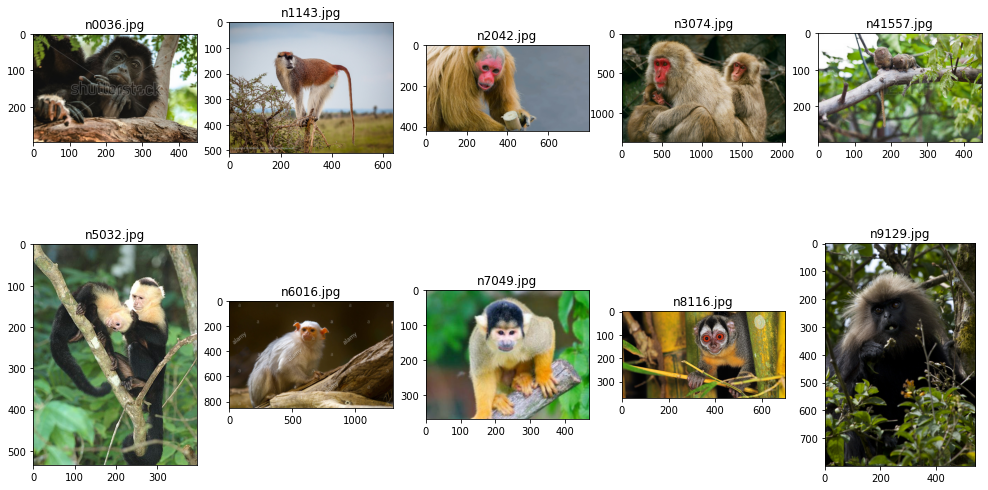

In [62]:
import random
import cv2

f = plt.figure(figsize=(17,9))
for i in range(10):
    imgdir = os.path.join(dir_train, categories[i])
    imgfile = random.choice(os.listdir(imgdir))
    img = imread(os.path.join(imgdir, imgfile))
    #img=mpimg.imread("cat_and_dog/training_set/training_set/cats/cat.{}.jpg".format(r))
    ax=f.add_subplot(2,5,i+1)
    ax.title.set_text(imgfile)
    plt.imshow(img)


2. אילו סוגי קופים הכי דומים?
ואיזה סוגים ניראים לנו שונה אבל המודל כן התבלבל ביניהם?


[Text(0, 0.5, 'n0'),
 Text(0, 1.5, 'n1'),
 Text(0, 2.5, 'n2'),
 Text(0, 3.5, 'n3'),
 Text(0, 4.5, 'n4'),
 Text(0, 5.5, 'n5'),
 Text(0, 6.5, 'n6'),
 Text(0, 7.5, 'n7'),
 Text(0, 8.5, 'n8'),
 Text(0, 9.5, 'n9')]

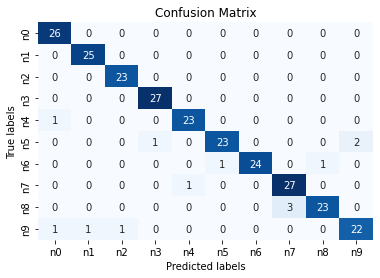

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test_fe, pred)
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax, fmt='d', cmap='Blues', cbar=False)
 
# labels, title and ticks
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(categories) 
ax.yaxis.set_ticklabels(categories)

בגלל שהמודל יחסית טוב אין כל כך בלבול בין סוגי הקופים, יש פה דיוק יפה אבל כן אפשר לראות למשל שהמודל טעה פעמיים שתמונה מסוג 5 הוא סיווג אותה לסוג 9
המודל גם טעה 3 פעמים תמונות מסוג 8 הוא סיווג אותן לסוג 7



 האם יש סוגים של קופים שניראים לנו שונים אבל המודל מתקשה להבדיל ביניהם?

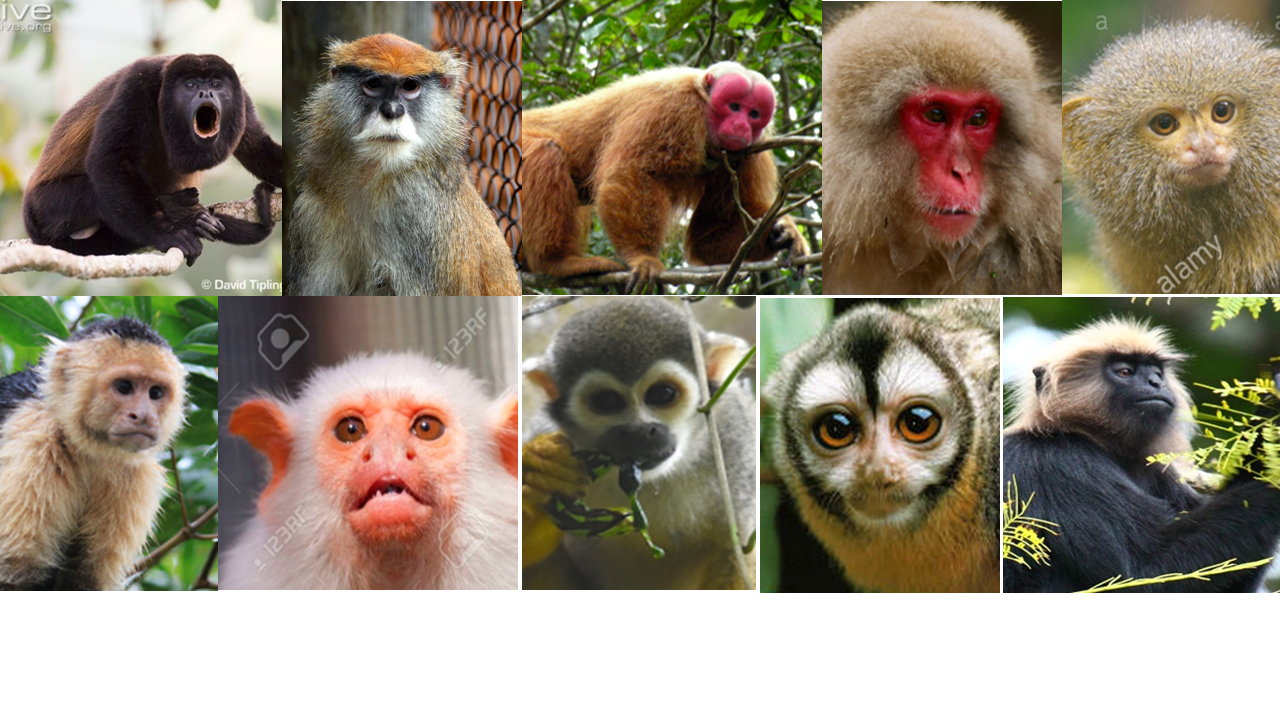

In [ ]:
from IPython.display import Image
Image('monkeys.png')

אנחנו יכולים לראות ש 5 ו 9 הם ממש שונים אבל בכל זאת המודל טעה 
פעמיים.
בסיווג תמונות מסוג 8 המודל סיווג שלוש פעמים לסוג 7 והם אכן קצת דומים.








3. האם טכניקות של למידה עמוקה יביאו לתוצאות טובות יותר? 

In [51]:
train_generator = ImageDataGenerator(rescale=1/255,
                                    rotation_range=40,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

valid_generator = ImageDataGenerator(rescale = 1/255)
epochs = 20
batch_size = 32 
img_width = 150
img_height = 150
target_size = (img_width, img_height)
#Finds images, transforms them
train_data = train_generator.flow_from_directory(dir_train, target_size=target_size, batch_size=batch_size,
                                                    class_mode='categorical')

test_data = valid_generator.flow_from_directory(dir_test, target_size=target_size, batch_size=batch_size,
                                                    class_mode='categorical', shuffle=False)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [52]:
from keras.models import Sequential
from tensorflow.keras import datasets, layers, models
train_samples = train_data.samples
valid_samples = test_data.samples
channels = 3 #RGB
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [74]:
#Fit the model
start = timeit.default_timer()
model.fit_generator(generator=train_data,
                    steps_per_epoch=train_samples/batch_size,
                    validation_data=test_data,
                    validation_steps=valid_samples/batch_size,
                    epochs=epochs)
stop = timeit.default_timer()
time_of_cnn = start-stop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
34/34 [==============================] - 92s 3s/step - loss: 0.6062 - accuracy: 0.7869 - val_loss: 1.1263 - val_accuracy: 0.6250
Epoch 2/20
34/34 [==============================] - 87s 2s/step - loss: 0.6045 - accuracy: 0.7896 - val_loss: 1.1535 - val_accuracy: 0.6838
Epoch 3/20
34/34 [==============================] - 71s 2s/step - loss: 0.5937 - accuracy: 0.8005 - val_loss: 1.4115 - val_accuracy: 0.6287
Epoch 4/20
34/34 [==============================] - 71s 2s/step - loss: 0.5057 - accuracy: 0.8324 - val_loss: 1.0839 - val_accuracy: 0.6765
Epoch 5/20
34/34 [==============================] - 71s 2s/step - loss: 0.4509 - accuracy: 0.8415 - val_loss: 0.9341 - val_accuracy: 0.7206
Epoch 6/20
34/34 [==============================] - 71s 2s/step - loss: 0.4864 - accuracy: 0.8461 - val_loss: 1.1866 - val_accuracy: 0.6985
Epoch 7/20
34/34 [==============================] - 71s 2s/step - loss: 0.4726 - accuracy: 0.8342 - val_loss: 1.1654 - val_accuracy: 0.6728
Epoch 8/20
34/34 [==

In [63]:
test_steps_per_epoch = np.math.ceil(test_data.samples// batch_size+1)
predictions = model.predict(test_data, steps=test_steps_per_epoch, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

#Get label names for the final table
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
labels = pd.read_csv("monkey_labels.txt", names=cols, skiprows=1)
labels = labels['Common Name']
print(metrics.classification_report(true_classes, predicted_classes,target_names=labels))
print(accuracy_score(true_classes,predicted_classes))

9/9 [==============================] - 10s 1s/step
                                 precision    recall  f1-score   support

 mantled_howler                       0.83      0.58      0.68        26
 patas_monkey                         0.56      0.50      0.53        28
 bald_uakari                          0.87      0.96      0.91        27
 japanese_macaque                     0.67      0.60      0.63        30
 pygmy_marmoset                       0.62      0.77      0.69        26
 white_headed_capuchin                0.87      0.46      0.60        28
 silvery_marmoset                     0.88      0.58      0.70        26
 common_squirrel_monkey               0.59      0.61      0.60        28
 black_headed_night_monkey            0.60      0.93      0.72        27
 nilgiri_langur                       0.62      0.88      0.73        26

                       accuracy                           0.68       272
                      macro avg       0.71      0.69      0.68       27

כן אפשר להגיע לתוצאות טובות קיבלנו דיוק של  68% על סט האימות , אבל המודל הנבחר שלי מהיר הרבה יותר ובקלות מביא לתוצאות טובות יותר.

אז מי יותר מהיר???

In [75]:
print("time feature extractor", time_of_featureExtractor)
print("time cnn", time_of_cnn)

time feature extractor -1.0849607970012585
time cnn -1595.5386014429969


5. האם התוצאות יהיו זהות כשנהפוך את התמונות לשחור לבן?

In [80]:
def x_and_y(datadir, categories):

  flat_data_arr=[]  # input array
  target_arr=[]  # output array

  for category in categories:
    #print(f'loading... category : {category}')
    path = os.path.join(datadir, category)  # a path to the specific category's subdirectory
    for img in os.listdir(path):  # for each file (image) in the subdirectory
      img_array = imread(os.path.join(path, img))  # load an image from file
      grayImage = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
      img_resized = resize(grayImage,(150,150,3))
      flat_data_arr.append(img_resized.flatten())
      target_arr.append(category)  
    print(f'loaded category : {category} successfully')

  flat_data = np.array(flat_data_arr)
  target = np.array(target_arr)
  df = pd.DataFrame(flat_data)  # dataframe
  df['label'] = target
  x = df.iloc[:,:-1]  # input data 
  y = df.iloc[:,-1]  # output data
  return x , y
X_train_bw ,y_train_bw = x_and_y(dir_train, categories)
X_test_bw ,y_test_bw = x_and_y(dir_test, categories)

loaded category : n0 successfully
loaded category : n1 successfully
loaded category : n2 successfully
loaded category : n3 successfully
loaded category : n4 successfully
loaded category : n5 successfully
loaded category : n6 successfully
loaded category : n7 successfully
loaded category : n8 successfully
loaded category : n9 successfully
loaded category : n0 successfully
loaded category : n1 successfully
loaded category : n2 successfully
loaded category : n3 successfully
loaded category : n4 successfully
loaded category : n5 successfully
loaded category : n6 successfully
loaded category : n7 successfully
loaded category : n8 successfully
loaded category : n9 successfully


In [81]:
X_train_bw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67460,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.370627,0.370627,0.370627,0.577373,0.577373,0.577373,0.430196,0.430196,0.430196,0.644706,0.644706,0.644706,0.812196,0.812196,0.812196,0.785882,0.785882,0.785882,0.659608,0.659608,0.659608,0.429608,0.429608,0.429608,0.413333,0.413333,0.413333,0.467412,0.467412,0.467412,0.377255,0.377255,0.377255,0.238039,0.238039,0.238039,0.665882,0.665882,0.665882,0.787451,...,0.179608,0.235294,0.235294,0.235294,0.151765,0.151765,0.151765,0.133725,0.133725,0.133725,0.152588,0.152588,0.152588,0.180275,0.180275,0.180275,0.196078,0.196078,0.196078,0.189686,0.189686,0.189686,0.224667,0.224667,0.224667,0.305529,0.305529,0.305529,0.259882,0.259882,0.259882,0.322745,0.322745,0.322745,0.581294,0.581294,0.581294,0.541176,0.541176,0.541176
1,0.324183,0.324183,0.324183,0.346183,0.346183,0.346183,0.441386,0.441386,0.441386,0.503046,0.503046,0.503046,0.473425,0.473425,0.473425,0.434209,0.434209,0.434209,0.392157,0.392157,0.392157,0.345098,0.345098,0.345098,0.336671,0.336671,0.336671,0.398248,0.398248,0.398248,0.452732,0.452732,0.452732,0.468279,0.468279,0.468279,0.496954,0.496954,0.496954,0.463830,...,0.290196,0.294397,0.294397,0.294397,0.589542,0.589542,0.589542,0.608928,0.608928,0.608928,0.530662,0.530662,0.530662,0.447172,0.447172,0.447172,0.476013,0.476013,0.476013,0.449285,0.449285,0.449285,0.359425,0.359425,0.359425,0.386235,0.386235,0.386235,0.377974,0.377974,0.377974,0.259935,0.259935,0.259935,0.208261,0.208261,0.208261,0.285525,0.285525,0.285525
2,0.400000,0.400000,0.400000,0.407333,0.407333,0.407333,0.407843,0.407843,0.407843,0.403569,0.403569,0.403569,0.398471,0.398471,0.398471,0.459922,0.459922,0.459922,0.727908,0.727908,0.727908,0.888824,0.888824,0.888824,0.878431,0.878431,0.878431,0.889582,0.889582,0.889582,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,...,0.422196,0.408497,0.408497,0.408497,0.403922,0.403922,0.403922,0.418902,0.418902,0.418902,0.443137,0.443137,0.443137,0.444719,0.444719,0.444719,0.444314,0.444314,0.444314,0.439621,0.439621,0.439621,0.439791,0.439791,0.439791,0.450039,0.450039,0.450039,0.515922,0.515922,0.515922,0.877582,0.877582,0.877582,0.826510,0.826510,0.826510,0.448941,0.448941,0.448941
3,0.439216,0.439216,0.439216,0.420405,0.420405,0.420405,0.420405,0.420405,0.420405,0.419608,0.419608,0.419608,0.407843,0.407843,0.407843,0.411765,0.411765,0.411765,0.428038,0.428038,0.428038,0.474719,0.474719,0.474719,0.628729,0.628729,0.628729,0.899198,0.899198,0.899198,0.980392,0.980392,0.980392,0.853876,0.853876,0.853876,0.528243,0.528243,0.528243,0.458824,...,0.094540,0.088562,0.088562,0.088562,0.117647,0.117647,0.117647,0.191412,0.191412,0.191412,0.297739,0.297739,0.297739,0.294118,0.294118,0.294118,0.282353,0.282353,0.282353,0.278431,0.278431,0.278431,0.294118,0.294118,0.294118,0.313319,0.313319,0.313319,0.360784,0.360784,0.360784,0.392157,0.392157,0.392157,0.372549,0.372549,0.372549,0.333333,0.333333,0.333333
4,0.511425,0.511425,0.511425,0.491137,0.491137,0.491137,0.478431,0.478431,0.478431,0.474510,0.474510,0.474510,0.491294,0.491294,0.491294,0.521211,0.521211,0.521211,0.552697,0.552697,0.552697,0.586797,0.586797,0.586797,0.619503,0.619503,0.619503,0.635869,0.635869,0.635869,0.630118,0.630118,0.630118,0.619608,0.619608,0.619608,0.615686,0.615686,0.615686,0.607843,...,0.740523,0.796078,0.796078,0.796078,0.766588,0.766588,0.766588,0.727503,0.727503,0.727503,0.787007,0.787007,0.787007,0.662222,0.662222,0.662222,0.560654,0.560654,0.560654,0.557429,0.557429,0.557429,0.571599,0.571599,0.571599,0.617856,0.617856,0.617856,0.640288,0.640288,0.640288,0.545185,0.545185,0.545185,0.524837,0.524837,0.524837,0.533333,0.533333,0.533333
...,...,...,...

In [82]:
logistic_pred_bw, logistic_acc_bw = apply_classifier(logistic, X_train_bw, X_test_bw, y_train_bw, y_test_bw)
lin_svc_pred_bw, lin_svc_acc_bw = apply_classifier(lin_svc, X_train_bw, X_test_bw, y_train_bw, y_test_bw)
svc_pred_bw , svc_acc_bw = apply_classifier(svc, X_train_bw, X_test_bw, y_train_bw, y_test_bw, grid= True)
ada_pred_bw, ada_acc_bw = apply_classifier(adaboost,X_train_bw, X_test_bw, y_train_bw, y_test_bw)

data = [["Logistic Regression", logistic_acc_bw],
        ["LinearSVC",lin_svc_acc_bw],
        ["svc",svc_acc_bw],
        ["Adaboost",ada_acc_bw],
        
]
col_names = ["Model", "Success"]
print(tabulate(data,headers = col_names,tablefmt="fancy_grid"))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.3897058823529412
Accuracy: 0.35661764705882354
Accuracy: 0.4889705882352941
Accuracy: 0.21691176470588236
╒═════════════════════╤═══════════╕
│ Model               │   Success │
╞═════════════════════╪═══════════╡
│ Logistic Regression │  0.389706 │
├─────────────────────┼───────────┤
│ LinearSVC           │  0.356618 │
├─────────────────────┼───────────┤
│ svc                 │  0.488971 │
├─────────────────────┼───────────┤
│ Adaboost            │  0.216912 │
╘═════════════════════╧═══════════╛


כמו שאנחנו יכולים לראות אחוזי ההצלחה ירדו בכל המודלים חוץ מאדבוסט שעלה ממש מעט .
